Strongly negatively correlated variable pairs (correlation < -0.6):
       Variable 1     Variable 2  Correlation
22   J4:BOAT_COND  J4: REASON-NO     0.808755
23  J4: REASON-NO   J4:BOAT_COND     0.808755
27           J5.2           J5.4     0.634521
29           J5.4           J5.2     0.634521
31           J5.4           J5.5     0.602057
32           J5.5           J5.4     0.602057
39           J6.3           J6.4     0.668713
40           J6.3           J6.5     0.654254
41           J6.3           J7.4     0.637791
42           J6.4           J6.3     0.668713
44           J6.4           J6.5     0.741165
45           J6.4           J6.6     0.653232
46           J6.4           J7.3     0.611350
47           J6.4           J7.4     0.607613
48           J6.5           J6.3     0.654254
49           J6.5           J6.4     0.741165
51           J6.5           J6.6     0.641472
52           J6.5           J7.4     0.603015
53           J6.6           J6.4     0.653232
54          

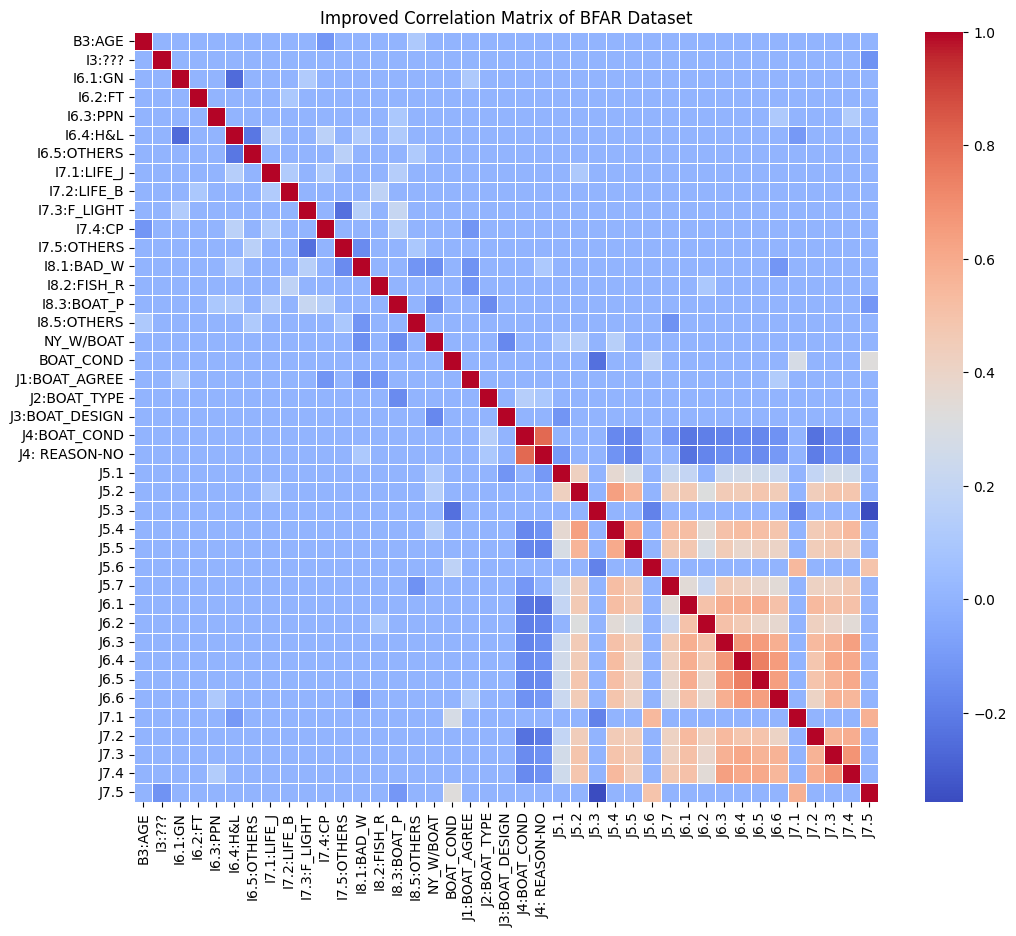

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset.csv")  # Adjust file path if needed

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix (automatically ignores NaN pairwise)
corr_matrix = df_numeric.corr()

# Set a threshold to ignore weak correlations
corr_matrix = corr_matrix.where(abs(corr_matrix) > 0.1, 0)  # Set correlations < 0.1 to 0 for clarity

# Find strongly negative correlated variables (threshold < -0.)
strong_neg_corr = corr_matrix[(corr_matrix > 0.6)].stack().reset_index()
strong_neg_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
strong_neg_corr = strong_neg_corr[strong_neg_corr["Variable 1"] != strong_neg_corr["Variable 2"]]  # Remove self-correlations

# Print strongly negative correlated pairs
if not strong_neg_corr.empty:
    print("Strongly negatively correlated variable pairs (correlation < -0.6):")
    print(strong_neg_corr)
else:
    print("No strongly negative correlations found.")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Improved Correlation Matrix of BFAR Dataset")
plt.show()
